In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

11490434/11490434 [==============================] - 1s 0us/step


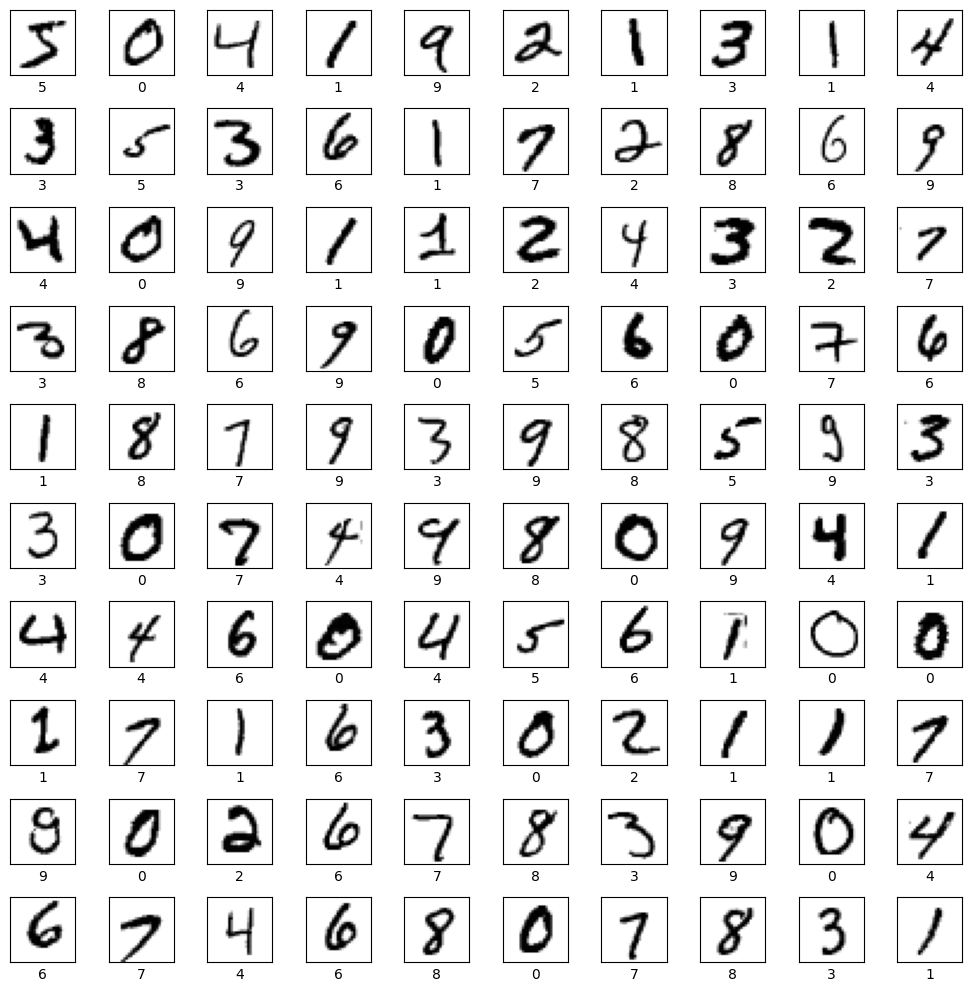

In [ ]:
#importing dataset from tensorflow.keras
from tensorflow.keras.datasets import mnist

#data is already split into training (60000 elements) and testing (10000 elements)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#displaying the first 100 images

plt.figure(figsize=(10,10)) #size
for i in range(100):
    plt.subplot(10,10,i+1) #creates 10 by 10 grid, activates "i+1"th one to perform the following actions
    plt.xticks([]) #hide x values
    plt.yticks([]) #hide y values
    plt.grid(False) #no grid lines
    plt.imshow(X_train[i], cmap=plt.cm.binary) #displays image at index "i" in grayscale
    plt.xlabel(y_train[i]) #add labels
plt.tight_layout(pad=1.0) #add padding
plt.show() #show graph

In [ ]:

#make images 3d, image feature 4d. We must do this for CNN to work. New dimension is just 1 since our image is grayscale.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#normalizing the images becuase we want small input values for neural networks. Image pixel values range from 0 to 255, so we divide by 255 to normalize them.
X_train, X_test = X_train / 255.0, X_test / 255.0

#one hot encoding on labels, using the to_categorical function from keras.utils
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Note: there are many lines that are commented out. These are the results of me testing different layers to see which would work best.
from tensorflow.keras.layers import  GlobalAveragePooling2D, BatchNormalization, Dropout


clf = Sequential() #build model
clf.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Adds a convolutional layer that will scan across images
#It has 32 filters (weights). (3,3) means it will cover 3 x 3 area of image. Is Input_shape is our image dimensions.
#clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size=(2, 2)))  #pooling. It takes every 2x2 in feature map and keeps only the maximum value.
#clf.add(Dropout(0.25))


clf.add(Conv2D(64, (3, 3), activation='relu')) #second convolutional layer.
#clf.add(BatchNormalization())
#clf.add(GlobalAveragePooling2D()) #pool again
#clf.add(Dropout(0.25))
clf.add(Flatten())  #make features maps one dimension. This is neccecary to implement the dense layers.

clf.add(Dense(128, activation='relu')) #dense layer is fully connected to the neurons of the previous input.
#clf.add(BatchNormalization())
#clf.add(Dropout(0.25))
clf.add(Dense(10, activation='softmax')) # since this is the last layer it needs 10 neurons. The softmax function outputs probability values for each of the 10 classes.


#Compile model
clf.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#save fit history
clf_history = clf.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

#each epoch takes around 100 seconds so this is very slow. You can ignore the "y-shape" and "output shape" stuff that you may see below. It's from a previous attempt at debugging.


Epoch 1/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1173 - accuracy: 0.9648 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0298 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0385 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0455 -

In [ ]:
#loading prediction.
pred = clf.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [ ]:
#the prediction.
pred

array([[3.9801421e-14, 1.8789706e-11, 5.3258209e-12, ..., 9.9999994e-01,
        1.1001138e-14, 5.6134548e-11],
       [4.3232802e-14, 3.7278199e-13, 9.9999994e-01, ..., 3.9410992e-23,
        1.2481653e-17, 2.0946008e-18],
       [9.9270344e-14, 9.9999994e-01, 3.9291717e-12, ..., 5.0574003e-09,
        2.2851734e-09, 8.6031434e-12],
       ...,
       [6.4366839e-25, 9.7507616e-19, 1.7703929e-22, ..., 4.0086590e-14,
        1.2314963e-13, 7.3672707e-15],
       [5.6668349e-22, 4.2616322e-25, 1.3039684e-28, ..., 6.8659798e-22,
        5.5236675e-14, 3.4477951e-24],
       [3.1785905e-13, 6.2252238e-15, 3.1011777e-16, ..., 2.0629895e-21,
        1.6588349e-10, 7.5338022e-18]], dtype=float32)

In [ ]:
#Both pred and y_test are encoded, so they are both 2d arrays. We can unencode them using the np.argmax function.
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
#accuracy score. It's the same as the val_accuracy from the last epoch since the validation data is literally the same as testing data.
from sklearn.metrics import accuracy_score

accuracy_score(pred, y_test)


0.9888

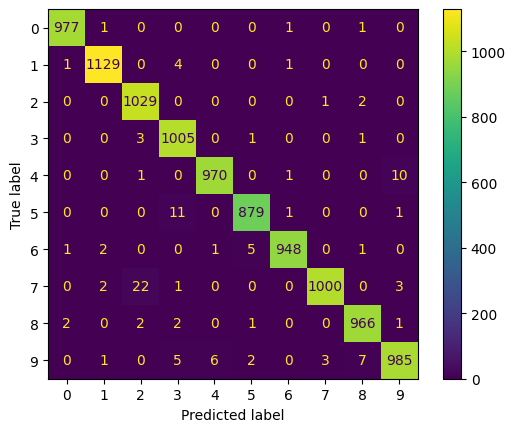

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#creating and displaying a confusion matrix. This matrix is slightly different than the one we displayed.
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
cmd.plot()

plt.show()

In [ ]:
#Testing with real pictures! Images can be found in the my_images folder.
from PIL import Image
import numpy as np
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Open the image file
image = Image.open("/content/drive/MyDrive/my_images/my8.jpg").convert('L')
# Convert the image to an array
image_array = img_to_array(image)

# Normalize the array
image_array = 1 - image_array / 255.0   # color inversion. although the images are displayed as black text and white background, they are actually white text and black background so we need to flip the colors.

# Ensure the image has the shape (1, 28, 28, 1)
image_array = np.expand_dims(image_array, axis=[0])

# Predict the digit
new_pred = clf.predict(image_array)

new_pred = np.argmax(new_pred, axis=1)

#output
print("the number is", new_pred[0])

1/1 [==============================] - 0s 151ms/step
the number is 8
